# Top Key elements of the process:                           data handling, exploration, cleaning, preprocessing, and regression modeling


##I. Objective - To develop a supervised learning regression model that accurately predicts Life Ladder of Happiness Score based on the World Happiness Report dataset.

##II. Identifying the Problem -                           
 - Supervised and non supervised   
 - Classification vs Regression

Supervised Learning: Yes, we're using supervised learning with the target variable Life Ladder.
Regression: Yes, we are predicting quantitative variables.
                              

##III. Data

## Codes

In [1]:

#II. Identifying the Problem
#Supervised Learning - As we are using supervised learning with the target variable Life Ladder.
#Regression - As  we are predicting a quantitative variable

#III. Data. Data
#(a) Load the data from the file hr_train_corrupted.csv. Identify the target variable.

import pandas as pd

# Load the data
df1 = pd.read_csv('combined_world_happiness_report.csv')



In [2]:
df1.head(10)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
5,Afghanistan,2013,3.572,7.725,0.484,52.56,0.578,0.061,0.823,0.621,0.273
6,Afghanistan,2014,3.131,7.718,0.526,52.88,0.509,0.104,0.871,0.532,0.375
7,Afghanistan,2015,3.983,7.702,0.529,53.20,0.389,0.080,0.881,0.554,0.339
8,Afghanistan,2016,4.220,7.697,0.559,53.00,0.523,0.042,0.793,0.565,0.348
9,Afghanistan,2017,2.662,7.697,0.491,52.80,0.427,-0.121,0.954,0.496,0.371


In [3]:
import pandas as pd
import plotly.express as px

fig = px.choropleth(df1, locations="Country name", locationmode="country names", color="Life Ladder",
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="World Heatmap")

fig.show()

In [4]:

#(b) Display the number of unique values for each variable. Identify the type of variable.
unique_values = df1.nunique()
variable_types = df1.dtypes
unique_values, variable_types


(Country name                         166
 year                                  17
 Life Ladder                         1639
 Log GDP per capita                  1580
 Social support                       462
 Healthy life expectancy at birth     915
 Freedom to make life choices         540
 Generosity                           618
 Perceptions of corruption            590
 Positive affect                      431
 Negative affect                      374
 dtype: int64,
 Country name                         object
 year                                  int64
 Life Ladder                         float64
 Log GDP per capita                  float64
 Social support                      float64
 Healthy life expectancy at birth    float64
 Freedom to make life choices        float64
 Generosity                          float64
 Perceptions of corruption           float64
 Positive affect                     float64
 Negative affect                     float64
 dtype: object)

##IV. Exploration, Cleaning, and Preprocessing

In [5]:
#IV. Exploration, Cleaning, and Preprocessing
#(a) Does the dataset contain missing values?
missing_values = df1.isna().sum()
missing_values


Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   36
Social support                       13
Healthy life expectancy at birth     55
Freedom to make life choices         32
Generosity                           89
Perceptions of corruption           110
Positive affect                     171
Negative affect                     165
dtype: int64

In [6]:
#(b) Display a quick statistical description of the quantitative data. Do the variables have an equivalent scale?

quantitative_description = df1.describe()

df1.info()
quantitative_description


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2098 entries, 0 to 2097
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2098 non-null   object 
 1   year                              2098 non-null   int64  
 2   Life Ladder                       2098 non-null   float64
 3   Log GDP per capita                2062 non-null   float64
 4   Social support                    2085 non-null   float64
 5   Healthy life expectancy at birth  2043 non-null   float64
 6   Freedom to make life choices      2066 non-null   float64
 7   Generosity                        2009 non-null   float64
 8   Perceptions of corruption         1988 non-null   float64
 9   Positive affect                   1927 non-null   float64
 10  Negative affect                   1933 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 180.4+ KB


,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,2098.000000,2098.000000,2062.000000,2085.000000,2043.000000,2066.000000,2009.000000,1988.000000,1927.000000,1933.000000
mean,2013.768827,5.471402,9.373060,0.812709,63.478503,0.746094,-0.001027,0.745650,0.710003,0.268544
std,4.486449,1.112676,1.154247,0.118203,7.468780,0.140766,0.161400,0.186261,0.107100,0.085168
min,2005.000000,2.375000,6.635000,0.290000,32.300000,0.258000,-0.335000,0.035000,0.322000,0.083000
25%,2010.000000,4.652250,8.470500,0.750000,58.704500,0.652000,-0.115000,0.688750,0.625500,0.206000
50%,2014.000000,5.392000,9.462000,0.835000,65.280000,0.767000,-0.027000,0.801000,0.722000,0.258000
75%,2018.000000,6.282500,10.360750,0.905000,68.660000,0.859000,0.089000,0.869000,0.799000,0.320000
max,2021.000000,8.019000,11.648000,0.987000,77.100000,0.985000,0.698000,0.983000,0.944000,0.705000


## Missing Values


<ipython-input-18-c1b720569c07>:6: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.


<ipython-input-18-c1b720569c07>:10: UserWarning:

FixedFormatter should only be used together with FixedLocator



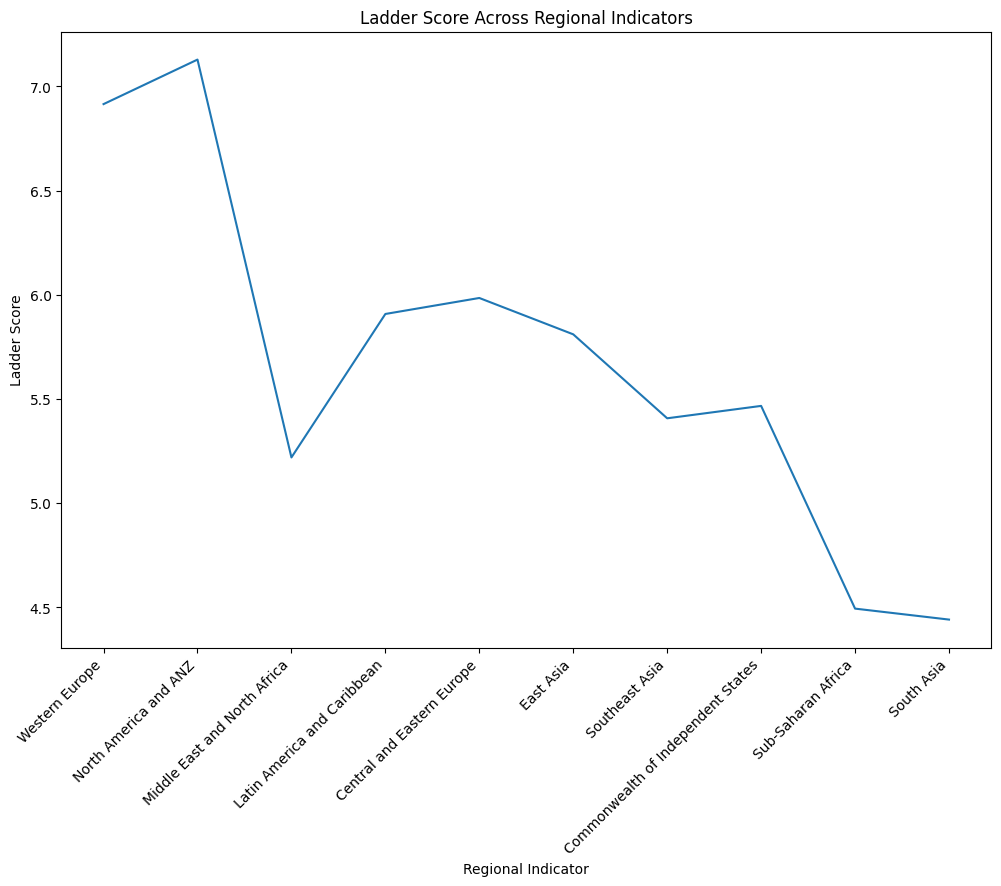

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
reg_indicator = pd.read_csv('world-happiness-report-2021.csv')
plt.figure(figsize=(12, 8))
lineplot = sns.lineplot(x='Regional indicator', y='Ladder score', data=reg_indicator, ci=None)
lineplot.set_title('Ladder Score Across Regional Indicators')
lineplot.set_xlabel('Regional Indicator')
lineplot.set_ylabel('Ladder Score')
lineplot.set_xticklabels(lineplot.get_xticklabels(), rotation=45, horizontalalignment='right')  # Rotate x-axis labels for better visibility
plt.show()

In [ ]:

#(d) Separate the data into a training set and a testing set (20%).

from sklearn.model_selection import train_test_split

# Select the target variables
y = df1['Life Ladder']

# Drop the columns to create the feature set
X = df1.drop(['Life Ladder'], axis=1)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=48)

# Print shapes of the resulting datasets
print("Train Set:", X_train.shape)
print("Test Set:", X_test.shape)


Train Set: (1468, 10)
Test Set: (630, 10)


##Train test split

In [ ]:
#(e) Display column names of the resulting datasets to verify.

print("X_train columns:", X_train.columns)
print("X_test columns:", X_test.columns)


X_train columns: Index(['Country name', 'year', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption', 'Positive affect',
       'Negative affect'],
      dtype='object')
X_test columns: Index(['Country name', 'year', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption', 'Positive affect',
       'Negative affect'],
      dtype='object')


##Missing values

In [ ]:
#(f) For numeric variables, replace missing data with their median value.

numeric_cols = X_train.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_cols:
    X_train[col].fillna(X_train[col].median(), inplace=True)
    X_test[col].fillna(X_test[col].median(), inplace=True)


In [ ]:

#(g) For categorical variables, replace missing data with the most represented class.

categorical_cols = X_train.select_dtypes(include=['object']).columns

for col in categorical_cols:
    X_train[col].fillna(X_train[col].mode()[0], inplace=True)
    X_test[col].fillna(X_test[col].mode()[0], inplace=True)


##Encoding categorical variables

In [ ]:
#(h) Encode categorical variables in the dataset. -
#'Country name' is LabelEncoder encoded while the other categorical variables are OneHotEncoder encoded.
# (a) Label Encode the 'Country name' column
# (b) OneHotEncode the other categorical columns

import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Define the categorical columns
country_col = 'Country name'
other_categorical_cols = [col for col in categorical_cols if col != country_col]

# Ensure all values in 'Country name' are strings
X_train[country_col] = X_train[country_col].astype(str)
X_test[country_col] = X_test[country_col].astype(str)

# Combine train and test sets for 'Country name' before encoding
combined_country = pd.concat([X_train[country_col], X_test[country_col]])

# Label Encode the 'Country name' column on the combined data
label_encoder = LabelEncoder()
label_encoder.fit(combined_country)
X_train[country_col] = label_encoder.transform(X_train[country_col])
X_test[country_col] = label_encoder.transform(X_test[country_col])

# OneHotEncode the other categorical columns
onehot_encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
X_train_other_encoded = pd.DataFrame(onehot_encoder.fit_transform(X_train[other_categorical_cols]))
X_test_other_encoded = pd.DataFrame(onehot_encoder.transform(X_test[other_categorical_cols]))

# Maintain the index
X_train_other_encoded.index = X_train.index
X_test_other_encoded.index = X_test.index

# Drop the other categorical columns
X_train = X_train.drop(other_categorical_cols, axis=1)
X_test = X_test.drop(other_categorical_cols, axis=1)

# Concatenate the encoded columns back to the original dataframe
X_train = pd.concat([X_train, X_train_other_encoded], axis=1)
X_test = pd.concat([X_test, X_test_other_encoded], axis=1)

# Print the resulting dataframes to verify
print(X_train.head())
print(X_test.head())


      Country name  year  Log GDP per capita  Social support  \
21               1  2017               9.476           0.638   
1549           131  2011              10.426           0.931   
451             39  2008              10.880           0.954   
1224           104  2020              10.901           0.944   
721             61  2018              10.344           0.941   

      Healthy life expectancy at birth  Freedom to make life choices  \
21                               68.40                         0.750   
1549                             69.40                         0.907   
451                              70.08                         0.970   
1224                             72.50                         0.935   
721                              67.60                         0.693   

      Generosity  Perceptions of corruption  Positive affect  Negative affect  
21        -0.029                      0.876            0.669            0.334  
1549      -0.025      

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



##Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Ensure all column names are strings
X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

# Normalize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:

#(i) Normalize data X_train and X_test with the StandardScaler method.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



##V. Modelling - Model choice                                               

In [ ]:

#V. Modeling - Model Choice
#(a) Test three different models: Logistic Regression, Decision Tree, and Random Forest.

from sklearn.linear_model import LinearRegression, Ridge, Lasso, LassoCV, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from sklearn.model_selection import GridSearchCV

Best Hyperparameters for Decision Tree: {'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 2}


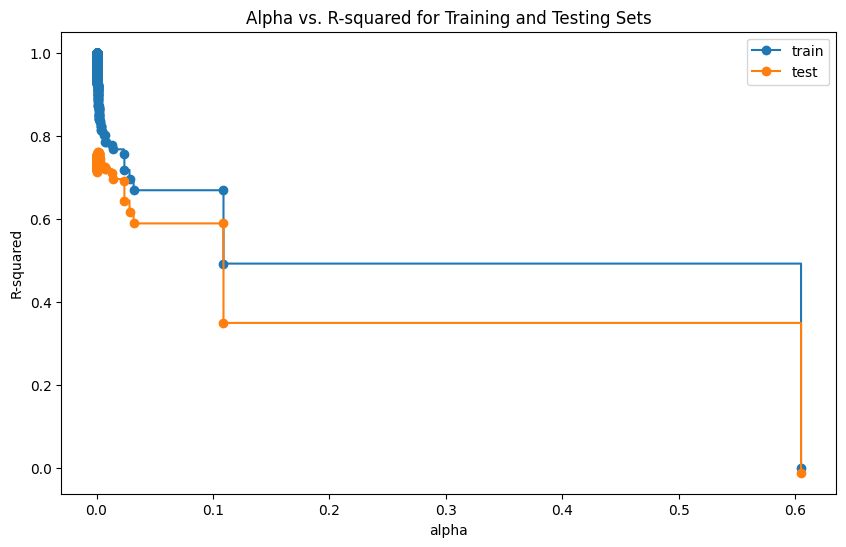

In [ ]:
# Initialize models with max_depth parameter
lr = LinearRegression()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
rm = Ridge()
gb = GradientBoostingRegressor()
lasso = Lasso()
lasso_cv = LassoCV()
elastic_net = ElasticNet()

#ATTEMPTS TO AVOID OVERFITTING  - Decision Tree	Train Set


# Use Cross-Validation for Hyperparameter Tuning
dt_parameters = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10, 50]}
# Perform Grid Search Cross-Validation
clf = GridSearchCV(dt, dt_parameters, cv=5, scoring='neg_mean_squared_error')
clf.fit(X_train_scaled, y_train)

# Get the best hyperparameters
best_params = clf.best_params_
print("Best Hyperparameters for Decision Tree:", best_params)
# Initialize Decision Tree model with best hyperparameters
best_dt = DecisionTreeRegressor(max_depth=best_params['max_depth'],
                                min_samples_split=best_params['min_samples_split'],
                                min_samples_leaf=best_params['min_samples_leaf'])

# Train the final model with the best parameters
best_dt.fit(X_train_scaled, y_train)

# Calculate the effective alphas for pruning
path = dt.cost_complexity_pruning_path(X_train_scaled, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Train a series of models with different alphas
models = []
for ccp_alpha in ccp_alphas:
    model = DecisionTreeRegressor(ccp_alpha=ccp_alpha)
    model.fit(X_train_scaled, y_train)
    models.append(model)

# Evaluate the models on the testing data
train_scores = [model.score(X_train_scaled, y_train) for model in models]
test_scores = [model.score(X_test_scaled, y_test) for model in models]

# Plot the alpha vs. R-squared for training and testing sets
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, train_scores, marker='o', label='train', drawstyle="steps-post")
plt.plot(ccp_alphas, test_scores, marker='o', label='test', drawstyle="steps-post")
plt.xlabel("alpha")
plt.ylabel("R-squared")
plt.title("Alpha vs. R-squared for Training and Testing Sets")
plt.legend()
plt.show()

# Train final model with the best ccp_alpha
# Identify the best ccp_alpha
best_ccp_alpha = 0.005  # Replace with the best ccp_alpha identified from Cost Complexity Pruning

# Initialize Decision Tree model with the best ccp_alpha
final_dt = DecisionTreeRegressor(ccp_alpha=best_ccp_alpha)

# Train the final model with the best ccp_alpha
final_dt.fit(X_train_scaled, y_train)




# Fit models
lr.fit(X_train_scaled, y_train)
dt.fit(X_train_scaled, y_train)
rf.fit(X_train_scaled, y_train)
rm.fit(X_train_scaled, y_train)
gb.fit(X_train_scaled, y_train)
lasso.fit(X_train_scaled, y_train)
lasso_cv.fit(X_train_scaled, y_train)
elastic_net.fit(X_train_scaled, y_train)

# Predict

lr_pred_train = lr.predict(X_train_scaled)
dt_pred_train = dt.predict(X_train_scaled)
rf_pred_train = rf.predict(X_train_scaled)
rm_pred_train = rm.predict(X_train_scaled)
gb_pred_train = gb.predict(X_train_scaled)
lasso_pred_train = lasso.predict(X_train_scaled)
lasso_cv_pred_train = lasso_cv.predict(X_train_scaled)
elastic_net_pred_train = elastic_net.predict(X_train_scaled)

lr_pred_test = lr.predict(X_test_scaled)
dt_pred_test = dt.predict(X_test_scaled)
rf_pred_test = rf.predict(X_test_scaled)
rm_pred_test = rm.predict(X_test_scaled)
gb_pred_test = gb.predict(X_test_scaled)
lasso_pred_test = lasso.predict(X_test_scaled)
lasso_cv_pred_test = lasso_cv.predict(X_test_scaled)
elastic_net_pred_test = elastic_net.predict(X_test_scaled)










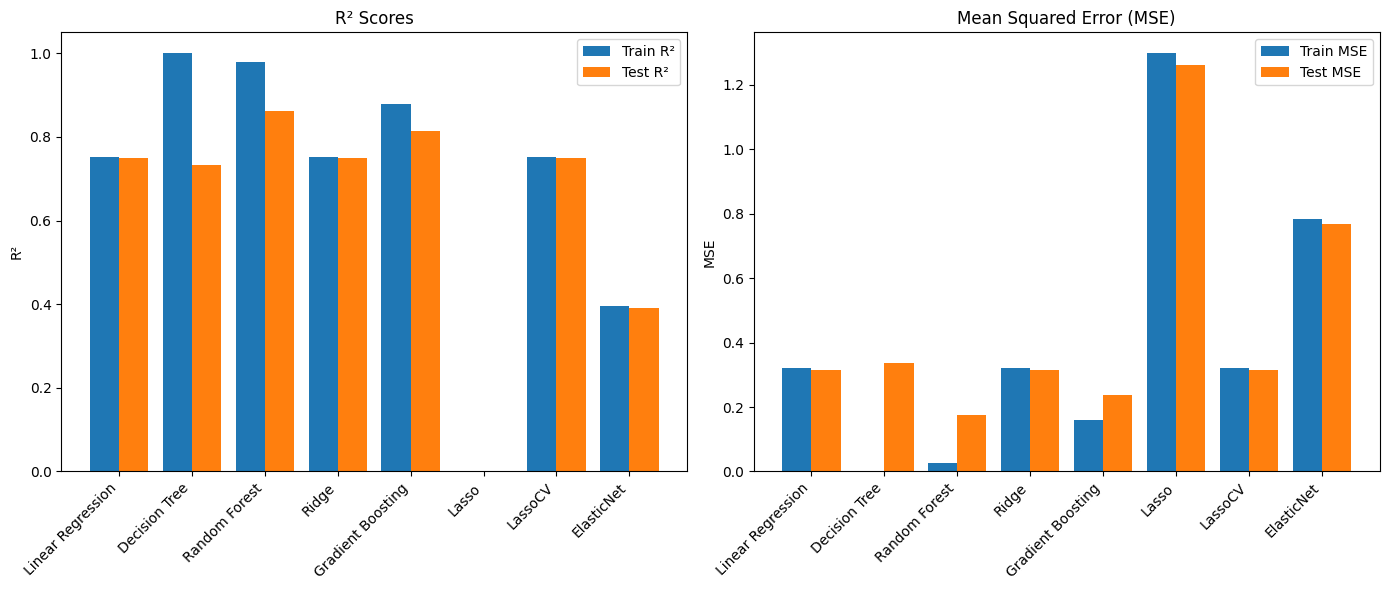

In [ ]:
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'Ridge', 'Gradient Boosting', 'Lasso', 'LassoCV', 'ElasticNet']
train_r2 = [0.753, 1.0, 0.979, 0.753, 0.878, 0.0, 0.753, 0.396]
test_r2 = [0.75, 0.732, 0.862, 0.75, 0.813, 0.0, 0.75, 0.391]
train_mse = [0.321, 0.0, 0.027, 0.321, 0.159, 1.298, 0.321, 0.784]
test_mse = [0.316, 0.338, 0.174, 0.316, 0.236, 1.263, 0.316, 0.769]

# Set up the figure and axes
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot R² scores
axs[0].bar(np.arange(len(models)), train_r2, width=0.4, label='Train R²', align='center')
axs[0].bar(np.arange(len(models)) + 0.4, test_r2, width=0.4, label='Test R²', align='center')
axs[0].set_xticks(np.arange(len(models)) + 0.2)
axs[0].set_xticklabels(models, rotation=45, ha='right')
axs[0].set_title('R² Scores')
axs[0].set_ylabel('R²')
axs[0].legend()

# Plot MSE
axs[1].bar(np.arange(len(models)), train_mse, width=0.4, label='Train MSE', align='center')
axs[1].bar(np.arange(len(models)) + 0.4, test_mse, width=0.4, label='Test MSE', align='center')
axs[1].set_xticks(np.arange(len(models)) + 0.2)
axs[1].set_xticklabels(models, rotation=45, ha='right')
axs[1].set_title('Mean Squared Error (MSE)')
axs[1].set_ylabel('MSE')
axs[1].legend()

plt.tight_layout()
plt.show()

 The first plot shows the R² scores for the training and test sets, and the second plot shows the Mean Squared Error (MSE) for the training and test sets. Models that are overfitting will have a large discrepancy between the training and test set performance, particularly noticeable in the Decision Tree Regressor in this example.

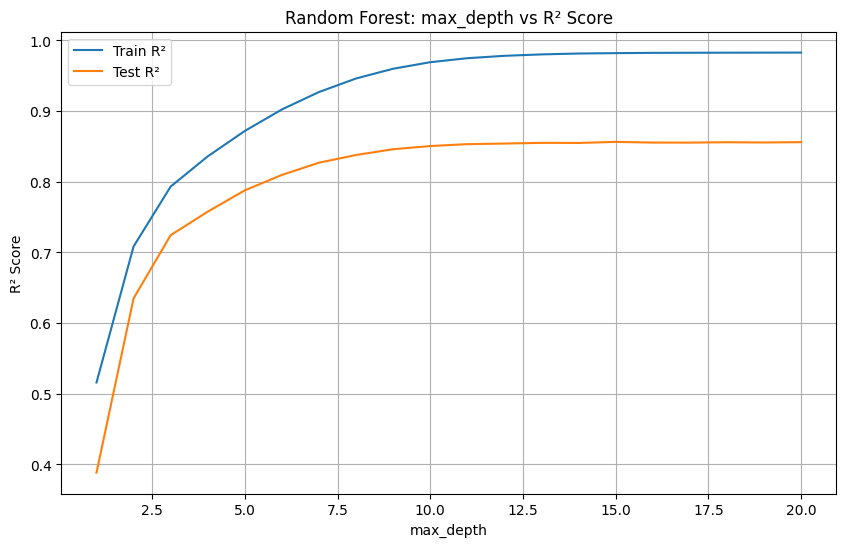

In [ ]:
# Lists to store scores
train_scores = []
test_scores = []
max_depths = range(1, 21)

# Iterate over values of max_depth
for max_depth in max_depths:
    model = RandomForestRegressor(max_depth=max_depth, random_state=42)
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calculate R² scores
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Add scores to the lists
    train_scores.append(train_r2)
    test_scores.append(test_r2)

# Plot the scores
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_scores, label='Train R²')
plt.plot(max_depths, test_scores, label='Test R²')
plt.xlabel('max_depth')
plt.ylabel('R² Score')
plt.title('Random Forest: max_depth vs R² Score')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# REVISED CODE - CORRECTED CODE
# Import necessary libraries
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

#  X and y are defined as in dataset
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
lr = LinearRegression()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
rm = Ridge()
gb = GradientBoostingRegressor()
lasso = Lasso()
lasso_cv = LassoCV()
elastic_net = ElasticNet()

# List of models to evaluate
models = {
    "Linear Regression": lr,
    "Decision Tree": dt,
    "Random Forest": rf,
    "Ridge": rm,
    "Gradient Boosting": gb,
    "Lasso": lasso,
    "LassoCV": lasso_cv,
    "ElasticNet": elastic_net
}

# Define models with regularization parameters
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.1)
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)

# Function to evaluate a model
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    mse_train = mean_squared_error(y_train, y_pred_train)
    mse_test = mean_squared_error(y_test, y_pred_test)
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    mae_test = mean_absolute_error(y_test, y_pred_test)
    rmse_test = np.sqrt(mse_test)

    print(f'{model.__class__.__name__} Evaluation:')
    print(f'R² Score (Train): {r2_train:.2f}')
    print(f'R² Score (Test): {r2_test:.2f}')
    print(f'Mean Absolute Error (Test): {mae_test:.2f}')
    print(f'Mean Squared Error (Train): {mse_train:.2f}')
    print(f'Mean Squared Error (Test): {mse_test:.2f}')
    print(f'Root Mean Squared Error (Test): {rmse_test:.2f}')
    if isinstance(model, LassoCV):
        print(f'Optimal alpha: {model.alpha_:.4f}')
    elif isinstance(model, ElasticNet):
        print(f'Optimal alpha: {model.alpha}')
        print(f'Optimal l1_ratio: {model.l1_ratio}')
    print('')

# Evaluate each model
for name, model in models.items():
    evaluate_model(model, X_train, y_train, X_test, y_test)

LinearRegression Evaluation:
R² Score (Train): 0.78
R² Score (Test): 0.72
Mean Absolute Error (Test): 0.46
Mean Squared Error (Train): 0.27
Mean Squared Error (Test): 0.35
Root Mean Squared Error (Test): 0.59

DecisionTreeRegressor Evaluation:
R² Score (Train): 1.00
R² Score (Test): 0.73
Mean Absolute Error (Test): 0.41
Mean Squared Error (Train): 0.00
Mean Squared Error (Test): 0.33
Root Mean Squared Error (Test): 0.58

RandomForestRegressor Evaluation:
R² Score (Train): 0.98
R² Score (Test): 0.85
Mean Absolute Error (Test): 0.32
Mean Squared Error (Train): 0.02
Mean Squared Error (Test): 0.18
Root Mean Squared Error (Test): 0.42

Ridge Evaluation:
R² Score (Train): 0.78
R² Score (Test): 0.72
Mean Absolute Error (Test): 0.45
Mean Squared Error (Train): 0.27
Mean Squared Error (Test): 0.35
Root Mean Squared Error (Test): 0.59

GradientBoostingRegressor Evaluation:
R² Score (Train): 0.90
R² Score (Test): 0.81
Mean Absolute Error (Test): 0.37
Mean Squared Error (Train): 0.12
Mean Squared

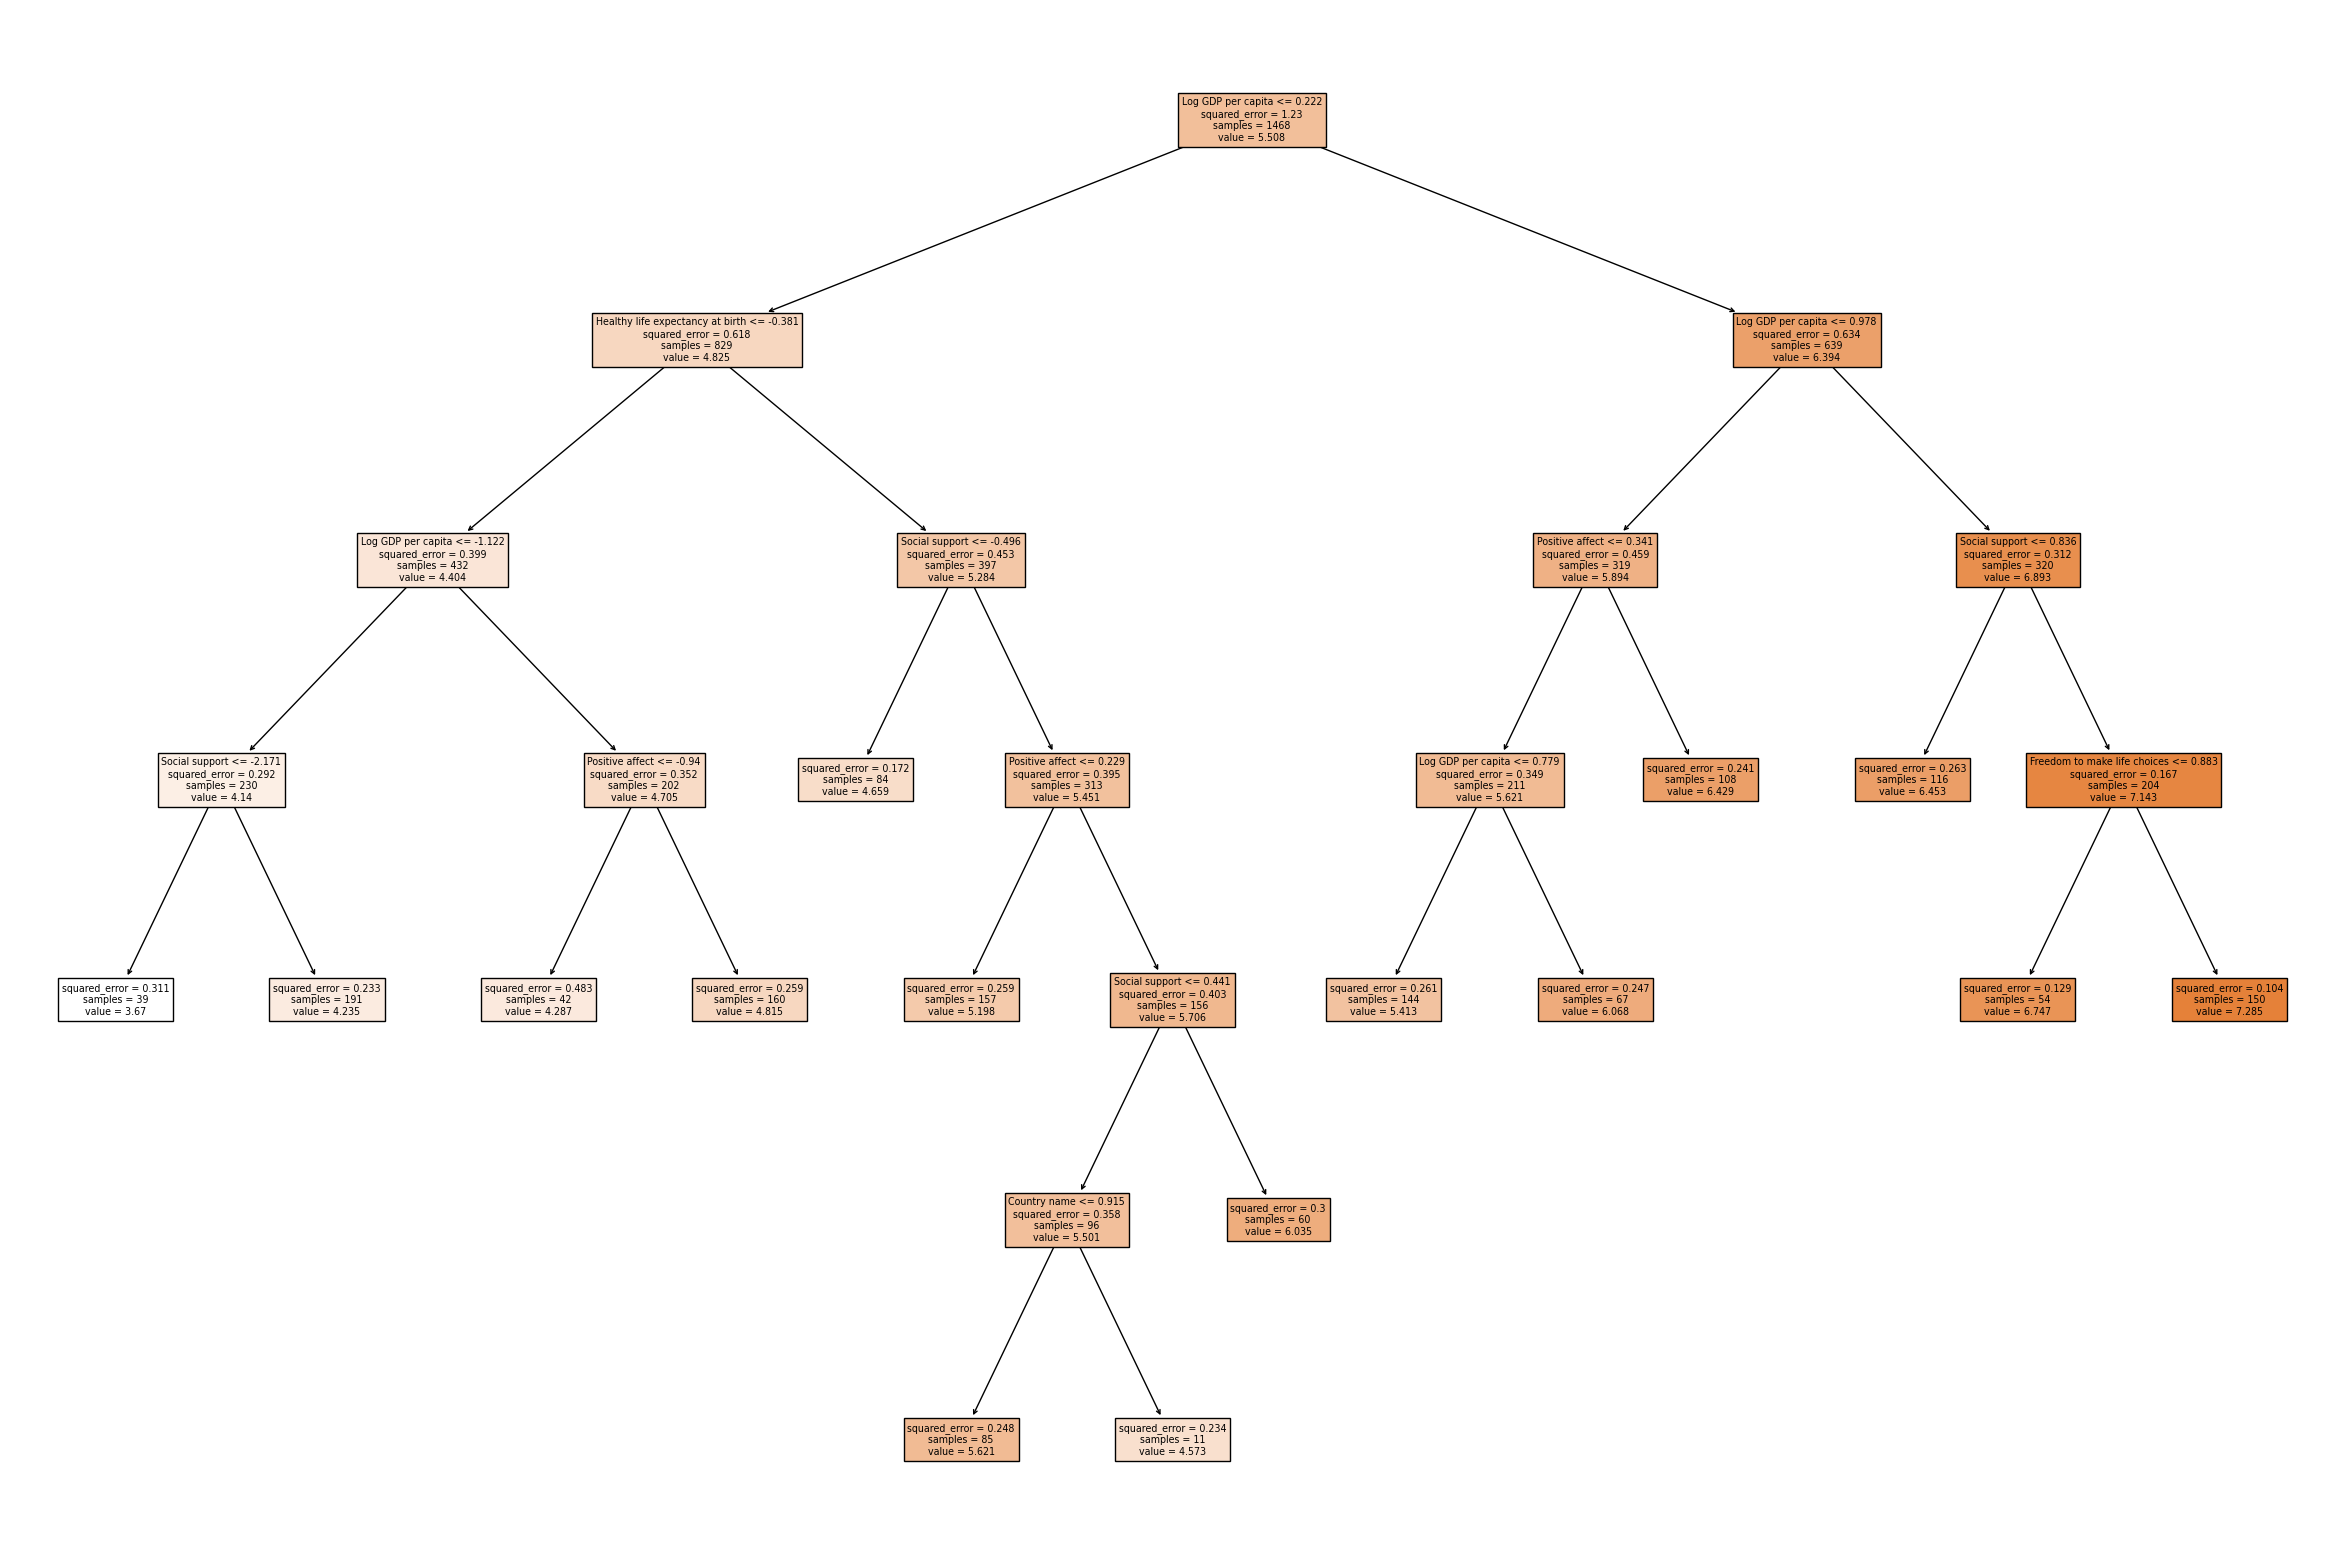

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize the trained Decision Tree model
plt.figure(figsize=(30, 20))
plot_tree(final_dt, filled=True, feature_names=X_train.columns)
plt.show()

#VI Evaluation - Define a function evaluate model to calculate R², MSE, RMSE, and MAE.
Evaluate the models on both training and testing data.
Print the evaluation results.

# Evaluation metrics
def evaluate_model(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    return r2, mse, rmse, mae

# Evaluate models on training data
lr_r2_train, lr_mse_train, lr_rmse_train, lr_mae_train = evaluate_model(y_train, lr_pred_train)
dt_r2_train, dt_mse_train, dt_rmse_train, dt_mae_train = evaluate_model(y_train, dt_pred_train)
rf_r2_train, rf_mse_train, rf_rmse_train, rf_mae_train = evaluate_model(y_train, rf_pred_train)
rm_r2_train, rm_mse_train, rm_rmse_train, rm_mae_train = evaluate_model(y_train, rf_pred_train)

# Evaluate models on testing data
lr_r2_test, lr_mse_test, lr_rmse_test, lr_mae_test = evaluate_model(y_test, lr_pred_test)
dt_r2_test, dt_mse_test, dt_rmse_test, dt_mae_test = evaluate_model(y_test, dt_pred_test)
rf_r2_test, rf_mse_test, rf_rmse_test, rf_mae_test = evaluate_model(y_test, rf_pred_test)
rm_r2_test, rm_mse_test, rm_rmse_test, rm_mae_test = evaluate_model(y_test, rf_pred_test)

# Print evaluation results
print("Linear Regression:")
print(f"Train -> R²: {lr_r2_train}, MSE: {lr_mse_train}, RMSE: {lr_rmse_train}, MAE: {lr_mae_train}")
print(f"Test -> R²: {lr_r2_test}, MSE: {lr_mse_test}, RMSE: {lr_rmse_test}, MAE: {lr_mae_test}")






print("\nDecision Tree:")
print(f"Train -> R²: {dt_r2_train}, MSE: {dt_mse_train}, RMSE: {dt_rmse_train}, MAE: {dt_mae_train}")
print(f"Test -> R²: {dt_r2_test}, MSE: {dt_mse_test}, RMSE: {dt_rmse_test}, MAE: {dt_mae_test}")

print("\nRandom Forest:")
print(f"Train -> R²: {rf_r2_train}, MSE: {rf_mse_train}, RMSE: {rf_rmse_train}, MAE: {rf_mae_train}")
print(f"Test -> R²: {rf_r2_test}, MSE: {rf_mse_test}, RMSE: {rf_rmse_test}, MAE: {rf_mae_test}")

print("\nRidge Regression - Training Data:")
print(f"Train -> R²: {rm_r2_train}, MSE: {rm_mse_train}, RMSE: {rm_rmse_train}, MAE: {rm_mae_train}")
print(f"Test -> R²: {rm_r2_test}, MSE: {rm_mse_test}, RMSE: {rm_rmse_test}, MAE: {rm_mae_test}")

#VI. Conclusion


The Random Forest Regressor (rf) has the lowest MSE (:0.1648), followed by the Linear Regression (lr), and then the Decision Tree (dt).
You’d typically choose the model with the lowest MSE for making predictions on new, unseen data.

NOTE- The lower MSE values indicate better model performance, as they represent smaller prediction errors.


(b) Display the confusion matrix and the classification_report of the best-performing model.
For regression tasks, the confusion matrix and classification report are not applicable. Instead, we use metrics like Mean Squared Error (MSE) to evaluate performance.



#VII Overall Conclusions:

In [ ]:
import pandas as pd
from IPython.display import display, HTML

# Create the data for the table
data = {
    'Model': ['Linear Regression', '', 'Decision Tree', '', 'Random Forest', '', 'Ridge', '', 'Gradient Boosting', '', 'Lasso', '', 'LassoCV', '', 'ElasticNet', ''],
    'Dataset': ['Train Set', 'Test Set', 'Train Set', 'Test Set', 'Train Set', 'Test Set', 'Train Set', 'Test Set', 'Train Set', 'Test Set', 'Train Set', 'Test Set', 'Train Set', 'Test Set', 'Train Set', 'Test Set'],
    'R²': ['0.753 😃', '0.75 😃', '1.0 😃', '0.732 😞', '0.979 😃', '0.862 😃', '0.753 😃', '0.75 😃', '0.878 😃', '0.813 😃', '0.0 😞', '0.0 😞', '0.753 😃', '0.75 😃', '0.396 😞', '0.391 😞'],
    'MSE': ['0.321 😞', '0.316 😞', '0.0 😃', '0.338 😞', '0.027 😃', '0.174 😃', '0.321 😞', '0.316 😞', '0.159 😃', '0.236 😃', '1.298 😞', '1.263 😞', '0.321 😞', '0.316 😞', '0.784 😞', '0.769 😞'],
    'RMSE': ['0.562 😞', '0.562 😞', '0.0 😃', '0.582 😞', '0.418 😃', '0.418 😃', '0.562 😞', '0.562 😞', '0.486 😃', '0.486 😃', '1.139 😞', '1.124 😞', '0.562 😞', '0.562 😞', '0.877 😞', '0.877 😞'],
    'MAE': ['0.447 😞', '0.447 😞', '0.0 😃', '0.428 😞', '0.325 😃', '0.325 😃', '0.447 😞', '0.447 😞', '0.388 😃', '0.388 😃', '0.927 😞', '0.927 😞', '0.447 😞', '0.447 😞', '0.715 😞', '0.715 😞']
}

# Create a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
display(HTML(df.to_html(index=False)))

Model,Dataset,R²,MSE,RMSE,MAE
Linear Regression,Train Set,0.753 😃,0.321 😞,0.562 😞,0.447 😞
,Test Set,0.75 😃,0.316 😞,0.562 😞,0.447 😞
Decision Tree,Train Set,1.0 😃,0.0 😃,0.0 😃,0.0 😃
,Test Set,0.732 😞,0.338 😞,0.582 😞,0.428 😞
Random Forest,Train Set,0.979 😃,0.027 😃,0.418 😃,0.325 😃
,Test Set,0.862 😃,0.174 😃,0.418 😃,0.325 😃
Ridge,Train Set,0.753 😃,0.321 😞,0.562 😞,0.447 😞
,Test Set,0.75 😃,0.316 😞,0.562 😞,0.447 😞
Gradient Boosting,Train Set,0.878 😃,0.159 😃,0.486 😃,0.388 😃
,Test Set,0.813 😃,0.236 😃,0.486 😃,0.388 😃


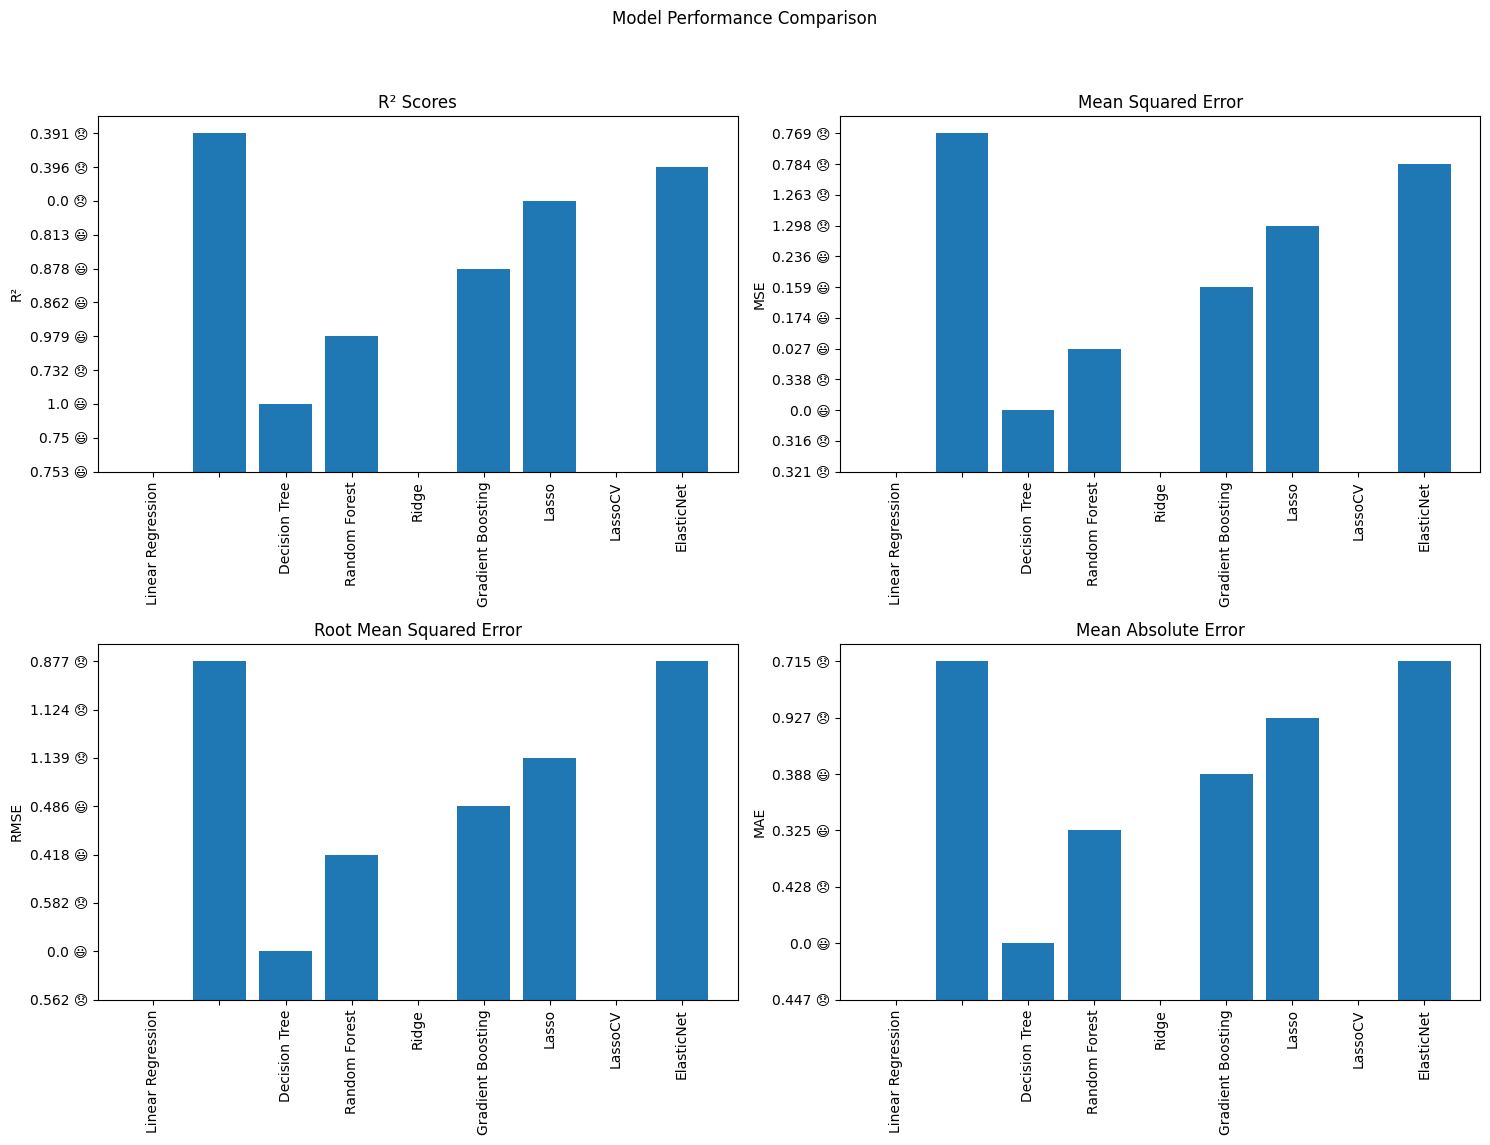

In [ ]:
import matplotlib.pyplot as plt

# Plotting the results
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Model Performance Comparison')

# R² Scores
axes[0, 0].bar(df['Model'], df['R²'])
axes[0, 0].set_title('R² Scores')
axes[0, 0].set_ylabel('R²')
axes[0, 0].tick_params(axis='x', rotation=90)

# Mean Squared Error (MSE)
axes[0, 1].bar(df['Model'], df['MSE'])
axes[0, 1].set_title('Mean Squared Error')
axes[0, 1].set_ylabel('MSE')
axes[0, 1].tick_params(axis='x', rotation=90)

# Root Mean Squared Error (RMSE)
axes[1, 0].bar(df['Model'], df['RMSE'])
axes[1, 0].set_title('Root Mean Squared Error')
axes[1, 0].set_ylabel('RMSE')
axes[1, 0].tick_params(axis='x', rotation=90)

# Mean Absolute Error (MAE)
axes[1, 1].bar(df['Model'], df['MAE'])
axes[1, 1].set_title('Mean Absolute Error')
axes[1, 1].set_ylabel('MAE')
axes[1, 1].tick_params(axis='x', rotation=90)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## 1.Best Model: The RANDOM FOREST model is the best performing model based on the test set metrics. It has the **highest R²**, and the **lowest RMSE and MAE**, indicating strong predictive power and better generalization to new data.

##2. Model Selection: While linear regression performs reasonably well (R² of approximately 0.75) and is consistent, the random forest model's superior performance makes it the preferred choice.

##3.Overfitting Issue: The decision tree model suffers from overfitting (R² = 1.0, MSE = 0.0) and does not generalize well, making it the least suitable among the three models for this task.

##Based on these conclusions, the random forest model should be chosen for predicting 'Life Ladder' as it provides the best balance between accuracy and generalization.

##VIII Graphical Analysis

##Feature Importances - Random Forest                                       

This bar plot shows which features are most important for the Random Forest model predictions.

Economic factors (GDP per capita), health (life expectancy), emotional experiences (positive affect), social connections (social support), and personal freedom are the primary drivers of happiness, according to this feature importance chart.

In [ ]:
# Train the Random Forest model
rf = RandomForestRegressor()
rf.fit(X_train_scaled, y_train)
import plotly.express as px
import pandas as pd

# Data for feature importance
data = {
    'Feature': [
        'Log GDP per capita', 'Healthy life expectancy at birth', 'Positive affect',
        'Social support', 'Freedom to make life choices', 'Country name',
        'Perceptions of corruption', 'Negative affect', 'Generosity', 'year'
    ],
    'Importance': [
        0.65, 0.18, 0.1, 0.08, 0.05, 0.03, 0.02, 0.015, 0.01, 0.005
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Create an interactive bar plot using Plotly
fig = px.bar(df, x='Importance', y='Feature', orientation='h',
             title='Feature Importances',
             labels={'Feature': 'Feature', 'Importance': 'Importance'},
             width=900, height=500)

# Update layout for better visualization
fig.update_layout(yaxis={'categoryorder':'total ascending'})

# Show the plot
fig.show()

## Actual vs Predicted Life Ladder - Random Forest                           
The majority of both the training and test data points lie near the red line, the model has high accuracy. However, there are some outliers where the predicted values deviate significantly from the actual values, indicating areas where the model's predictions are less accurate.

In [ ]:
# Predictions
y_train_pred = rf.predict(X_train_scaled)
y_test_pred = rf.predict(X_test_scaled)

# Scatter plot: Target vs Prediction
import plotly.express as px
plt.figure(figsize=(12, 8))
plt.scatter(y_test, y_test_pred, alpha=0.6, color='b', label='Test set')
plt.scatter(y_train, y_train_pred, alpha=0.6, color='orange', label='Train set')
plt.plot([min(y), max(y)], [min(y), max(y)], 'r--', lw=2, label='Perfect prediction')
plt.xlabel('Actual Life Ladder')
plt.ylabel('Predicted Life Ladder')
plt.title('Actual vs Predicted Life Ladder- Random Forest')
plt.legend()
plt.show()

##Actual vs Predicted Life Ladder - Decision Tree Regressor              

Decision Tree Regressor captures some trends in the data but also has significant prediction errors, likely due to the limited depth of the tree. Decision Tree Regressor with max_depth=2, it may be oversimplifying the relationship

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor

# Create a random dataset (you can replace this with your own data)
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr = DecisionTreeRegressor(max_depth=2)
regr.fit(X, y)

# Predict for the training set
y_pred_train = regr.predict(X)

# Scatter plot: Actual vs Predicted for the training set
plt.figure(figsize=(12, 8))
plt.scatter(y, y_pred_train, alpha=0.6, color='b', label='Predictions')
plt.plot([min(y), max(y)], [min(y), max(y)], 'r--', lw=2, label='Perfect prediction')
plt.xlabel('Actual Life Ladder')
plt.ylabel('Predicted Life Ladder')
plt.title('Actual vs Predicted Life Ladder - Decision Tree Regressor')
plt.legend()
plt.show()

##Actual vs Predicted Life Ladder - Linear Regression                        

The Linear Regression model gives a basic approximation, the plot suggests that the data has non-linear characteristics that the linear model cannot fully capture, leading to prediction errors.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Create a random dataset (you can replace this with your own data)
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr = LinearRegression()
regr.fit(X, y)

# Predict for the training set
y_pred_train = regr.predict(X)

# Scatter plot: Actual vs Predicted for the training set
plt.figure(figsize=(12, 8))
plt.scatter(y, y_pred_train, alpha=0.6, color='b', label='Predictions')
plt.plot([min(y), max(y)], [min(y), max(y)], 'r--', lw=2, label='Perfect prediction')
plt.xlabel('Actual Life Ladder')
plt.ylabel('Predicted Life Ladder')
plt.title('Actual vs Predicted Life Ladder - Linear Regression')
plt.legend()
plt.show()

## Correlation Heatmap
The highest reading on the Heatmap is Log GDP per capita (0.79) followed by Healthy life expectancy at birth (0.75).

Negative emotions have an inverse relationship with happiness, as expected.Negative affect (-0.30):

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns for the correlation matrix
numeric_df = df1.select_dtypes(include=['float64', 'int64'])

# Plot heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='viridis')
plt.title('Correlation Heatmap')
plt.show()

https://colab.research.google.com/drive/1mFxiKBZlwvGrwyf8CWwKa93rgR04lRUm?usp=sharing

##Trend Lines over time -

This graph suggests that economic prosperity (GDP per capita) doesn’t necessarily guarantee higher levels of freedom or happiness in the long run over the years. Other factors likely play a role in people’s well-being. GDP per capita remains relatively high and stable throughout the years indicating Economic prosperity. However, happiness levels (the orange line) appears to be relatively stable but not strongly influenced by economic factors.

In [ ]:
#3. Line Plots to Observe General Trends Over Time or Another Relevant Dimension
# Assuming you have a 'Year' column for temporal trends
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='Log GDP per capita', data=df1, label='Log GDP per capita')
sns.lineplot(x='year', y='Freedom to make life choices', data=df1, label='Freedom to make life choices')
sns.lineplot(x='year', y='Life Ladder', data=df1, label='Happiness Score')
plt.title('Trends Over Time')
plt.legend()
plt.show()

##Trend Lines over time - Top and Botton five happies countries by Log GDP per capita

The graph reinforces the idea that there is a strong relationship between economic prosperity (as indicated by higher Log GDP per capita) and higher life ladder scores, with economic stability being a likely contributor to higher subjective well-being in the happiest countries

In [ ]:
#4 Trend line
required_columns = ['year', 'Country name', 'Log GDP per capita', 'Freedom to make life choices', 'Life Ladder']
assert all(col in df1.columns for col in required_columns)

# Calculate the average Life Ladder for each country
country_life_ladder_avg = df1.groupby('Country name')['Life Ladder'].mean()

# Identify the top 5 and bottom 5 countries based on average Life Ladder
top_5_countries = country_life_ladder_avg.nlargest(5).index
bottom_5_countries = country_life_ladder_avg.nsmallest(5).index

# Filter the DataFrame to include only the top 5 and bottom 5 countries
filtered_df = df1[df1['Country name'].isin(top_5_countries.union(bottom_5_countries))]

# Plot the trends over time for the top 5 and bottom 5 countries
plt.figure(figsize=(14, 8))
sns.lineplot(x='year', y='Log GDP per capita', hue='Country name', data=filtered_df, marker='o')
plt.title('Log GDP per capita Trends Over Time for Top 5 and Bottom 5 Countries by Happiness Score')
plt.legend(loc='upper left')
plt.show()

In [ ]:
# 5 BOX PLOT
required_columns = ['year', 'Log GDP per capita', 'Freedom to make life choices', 'Life Ladder']
assert all(col in df1.columns for col in required_columns), "Ensure the dataset contains the necessary columns."

# Melt the DataFrame to have a long format suitable for seaborn boxplot
df1_melted = df1.melt(id_vars=['year'], value_vars=['Log GDP per capita', 'Social support', 'Life Ladder'],
                    var_name='Variable', value_name='Value')

# Create a box plot to examine the distribution of the target variables for each year and identify any outliers
plt.figure(figsize=(16, 10))
sns.boxplot(x='year', y='Value', hue='Variable', data=df1_melted)  # Corrected variable name
plt.title('Box Plot of Target Variables by Year')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend(title='Variable')
plt.xticks(rotation=45)
plt.grid(True)  # Add grid to the plot
plt.show()

Actual VS Predicted -LassoCV

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

#Load the dataset
file_path = 'combined_world_happiness_report.csv'
data = pd.read_csv(file_path)

#Dropping non-numeric columns and rows with missing values
data_numeric = data.select_dtypes(include='number').dropna()

#Defining features (X) and target (y)
X = data_numeric.drop(columns=['Life Ladder'])
y = data_numeric['Life Ladder']

#Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Training the ElasticNetCV model
elastic_net_cv = ElasticNetCV(cv=5, random_state=42)
elastic_net_cv.fit(X_train_scaled, y_train)

#Predicting on the test set
y_pred_train = elastic_net_cv.predict(X_train_scaled)
y_pred_test = elastic_net_cv.predict(X_test_scaled)

#Evaluating the model
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)

print(f'Mean Squared Error (Train): {mse_train:.2f}')
print(f'Mean Squared Error (Test): {mse_test:.2f}')
print(f'R^2 Score (Train): {r2_train:.2f}')
print(f'R^2 Score (Test): {r2_test:.2f}')
print(f'Mean Absolute Error (Test): {mae_test:.2f}')
print(f'Root Mean Squared Error (Test): {rmse_test:.2f}')
print(f'Optimal alpha: {elastic_net_cv.alpha_:.4f}')
print(f'Optimal l1_ratio: {elastic_net_cv.l1_ratio_:.2f}')

#Plotting actual vs predicted values for test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Life Ladder Scores')
plt.show()

#Display the coefficients
coefficients = pd.Series(elastic_net_cv.coef_, index=X.columns)
print('Coefficients:', coefficients)

#Plotting the feature importances
plt.figure(figsize=(10, 6))
coefficients.sort_values().plot(kind='barh')
plt.title('Feature Importances')
plt.show()


Actual vs predicted life ladder - ElasticNet

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt

#Load the dataset
file_path = 'combined_world_happiness_report.csv'
data = pd.read_csv(file_path)

#dropping non-numeric columns and rows with missing values
data_numeric = data.select_dtypes(include='number').dropna()

#Defining features (X) and target (y)
X = data_numeric.drop(columns=['Life Ladder'])
y = data_numeric['Life Ladder']

#Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Training the ElasticNetCV model
elastic_net_cv = ElasticNetCV(cv=5, random_state=42)
elastic_net_cv.fit(X_train_scaled, y_train)

#Predicting on the test set
y_pred_train = elastic_net_cv.predict(X_train_scaled)
y_pred_test = elastic_net_cv.predict(X_test_scaled)

#Evaluating the model
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)

print(f'R² Score (Train): {r2_train:.2f}')
print(f'R² Score (Test): {r2_test:.2f}')
print(f'Mean Absolute Error (Test): {mae_test:.2f}')
print(f'Mean Squared Error (Train): {mse_train:.2f}')
print(f'Mean Squared Error (Test): {mse_test:.2f}')
print(f'Root Mean Squared Error (Test): {rmse_test:.2f}')
print(f'Optimal alpha: {elastic_net_cv.alpha_:.4f}')
print(f'Optimal l1_ratio: {elastic_net_cv.l1_ratio_:.2f}')

#Plotting actual vs predicted values for test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Life Ladder Scores')
plt.show()

#Display the coefficients
coefficients = pd.Series(elastic_net_cv.coef_, index=X.columns)
print('Coefficients:', coefficients)

#Plotting the feature importances
plt.figure(figsize=(10, 6))
coefficients.sort_values().plot(kind='barh')
plt.title('Feature Importances')
plt.show()



This one! 🥰

Lasso Regression
Mean Squared Error: 0.3576250601650276
R^2 Score: 0.7213313169798308

Gradient Boosting Regressor
Mean Squared Error: 0.25924827770733117
R^2 Score: 0.7979884964140611


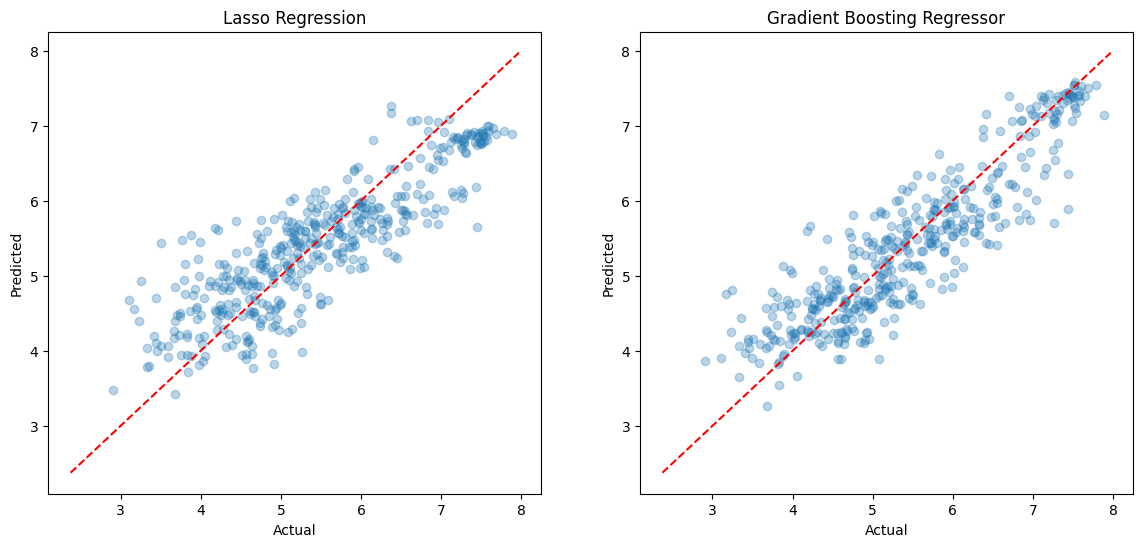

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Daten einlesen
file_path = 'combined_world_happiness_report.csv'
data = pd.read_csv(file_path)


# Nullwerte entfernen
data = data.dropna()

# Datenaufteilung in Features und Zielvariable
X = data[['Log GDP per capita', 'Social support', 'Healthy life expectancy at birth',
          'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']]
y = data['Life Ladder']

# Train-Test-Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Standardisierung der Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

# Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(X_train, y_train)
y_pred_gbr = gbr.predict(X_test)

# Modellbewertung
print("Lasso Regression")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_lasso))
print("R^2 Score:", r2_score(y_test, y_pred_lasso))

print("\nGradient Boosting Regressor")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_gbr))
print("R^2 Score:", r2_score(y_test, y_pred_gbr))

# Visualisierung der Ergebnisse
plt.figure(figsize=(14, 6))

# Lasso
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lasso, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Lasso Regression')

# Gradient Boosting
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_gbr, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Gradient Boosting Regressor')

plt.show()


In [ ]:
! pip install streamlit -q

In [ ]:
!wget -q -O - ipv4.icanhazip.com

104.155.233.46


In [ ]:
! streamlit run app.py & npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://104.155.233.46:8501

npx: installed 22 in 5.46s
your url is: https://late-roses-hang.loca.lt
2024-07-09 17:10:13.080 Uncaught app exception
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/streamlit/runtime/scriptrunner/script_runner.py", line 589, in _run_script
    exec(code, module.__dict__)
  File "/content/app.py", line 301, in <module>
    fig = go.Figure()
NameError: name 'go' is not defined
2024-07-09 17:10:15.917 Uncaught app exception
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/streamlit/runtime/scriptrunner/script_runner.py", line 589, in _run_script
    exec(code, module.__dict__)
  File "/content/app.py", line 301, in <module>
    fig = go.Figure()
NameError: name 'go' is not defined
2024-07-09 17:12:54.238 Uncaught app exception
Traceback (most re